# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Nima Khodaveisi
2.   Student Number: 98110146


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt

from tqdm import tqdm


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [5]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [6]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = plays.merge(artists, left_on='artistID', right_on='id').sort_values(by='id')
ap

,userID,artistID,weight,id,name
44425,785,1,76,1,MALICE MIZER
44424,274,1,483,1,MALICE MIZER
44423,34,1,212,1,MALICE MIZER
63519,135,2,1021,2,Diary of Dreams
63520,257,2,152,2,Diary of Dreams
...,...,...,...,...,...
77003,454,18741,301,18741,Diamanda Galás
77004,454,18742,294,18742,Aya RL
77005,454,18743,287,18743,Coptic Rain
77006,454,18744,286,18744,Oz Alchemist


In [4]:
ap

,userID,artistID,weight,id,name
44425,785,1,76,1,MALICE MIZER
44424,274,1,483,1,MALICE MIZER
44423,34,1,212,1,MALICE MIZER
63519,135,2,1021,2,Diary of Dreams
63520,257,2,152,2,Diary of Dreams
...,...,...,...,...,...
77003,454,18741,301,18741,Diamanda Galás
77004,454,18742,294,18742,Aya RL
77005,454,18743,287,18743,Coptic Rain
77006,454,18744,286,18744,Oz Alchemist


In [7]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap

,userID,artistID,playCount,id,name
44425,785,1,76,1,MALICE MIZER
44424,274,1,483,1,MALICE MIZER
44423,34,1,212,1,MALICE MIZER
63519,135,2,1021,2,Diary of Dreams
63520,257,2,152,2,Diary of Dreams
...,...,...,...,...,...
77003,454,18741,301,18741,Diamanda Galás
77004,454,18742,294,18742,Aya RL
77005,454,18743,287,18743,Coptic Rain
77006,454,18744,286,18744,Oz Alchemist


In [8]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap = ap.drop('id', axis=1).reset_index()
ap
#TODO

,index,userID,artistID,playCount,name
0,44425,785,1,76,MALICE MIZER
1,44424,274,1,483,MALICE MIZER
2,44423,34,1,212,MALICE MIZER
3,63519,135,2,1021,Diary of Dreams
4,63520,257,2,152,Diary of Dreams
...,...,...,...,...,...
92829,77003,454,18741,301,Diamanda Galás
92830,77004,454,18742,294,Aya RL
92831,77005,454,18743,287,Coptic Rain
92832,77006,454,18744,286,Oz Alchemist


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank = ap.groupby('name', group_keys=False)
artist_rank = artist_rank.aggregate({
    'userID': 'nunique',
    'playCount': np.sum
})

artist_rank.sort_values(by='userID', ascending=False)

artist_rank = artist_rank.rename(columns={
    "userID": "totalUniqueUsers", 
    "playCount": "totalArtistPlays"
})


artist_rank['avgUserPlays'] = artist_rank["totalArtistPlays"] / artist_rank["totalUniqueUsers"]

artist_rank = artist_rank.sort_values(by='totalUniqueUsers', ascending=False)

artist_rank


,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Lady Gaga,611,1291387,2113.563011
Britney Spears,522,2393140,4584.559387
Rihanna,484,905423,1870.708678
The Beatles,480,662116,1379.408333
Katy Perry,473,532545,1125.887949
...,...,...,...
Joan as Police Woman,1,258,258.000000
Joanna,1,226,226.000000
Joanna Pacitti,1,245,245.000000


In [12]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [8]:
bp = ap.copy()
bp

ap.query('userID == 1094').query('artistID == 511')

,index,userID,artistID,playCount,name
27234,26772,1094,511,320725,U2


In [10]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################


ap = ap.merge(artist_rank, left_on='name', right_on='name')

ap.head(20)

,index,userID,artistID,playCount,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,44425,785,1,76,MALICE MIZER,3,771,257.000000
1,44424,274,1,483,MALICE MIZER,3,771,257.000000
2,44423,34,1,212,MALICE MIZER,3,771,257.000000
3,63519,135,2,1021,Diary of Dreams,12,8012,667.666667
4,63520,257,2,152,Diary of Dreams,12,8012,667.666667
5,63521,325,2,3466,Diary of Dreams,12,8012,667.666667
6,63522,397,2,56,Diary of Dreams,12,8012,667.666667
7,63523,560,2,134,Diary of Dreams,12,8012,667.666667
8,63524,580,2,803,Diary of Dreams,12,8012,667.666667
9,63526,1551,2,868,Diary of Dreams,12,8012,667.666667


In [ ]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [11]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x=x[:20], y=y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

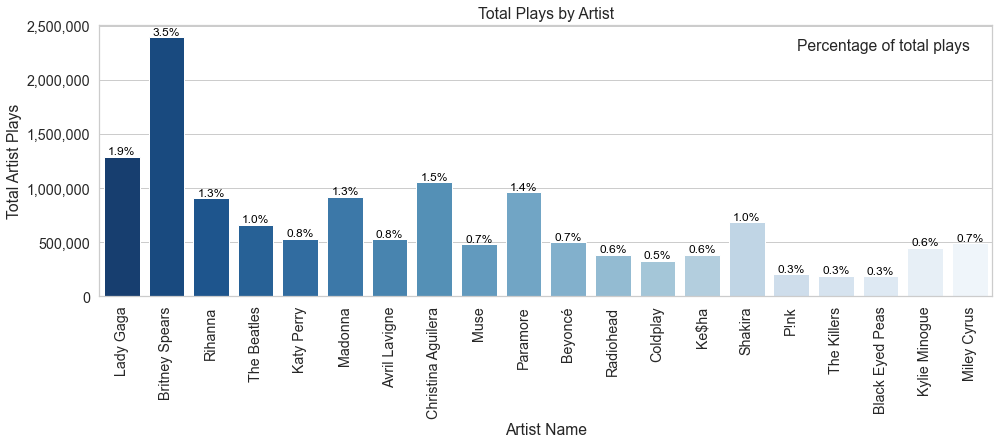

In [12]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

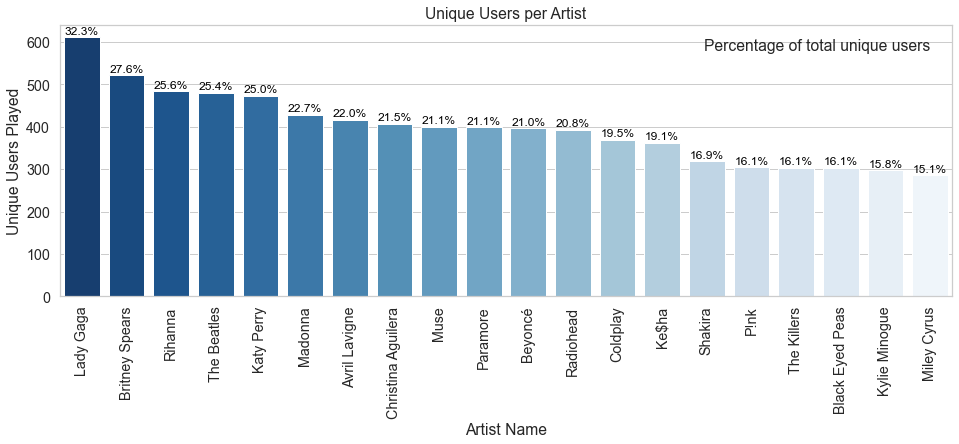

In [13]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [14]:
artist_rank.sort_values(by='totalArtistPlays', ascending=False).head(12)

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
Madonna,429,921198,2147.314685
Rihanna,484,905423,1870.708678
Shakira,319,688529,2158.398119
The Beatles,480,662116,1379.408333


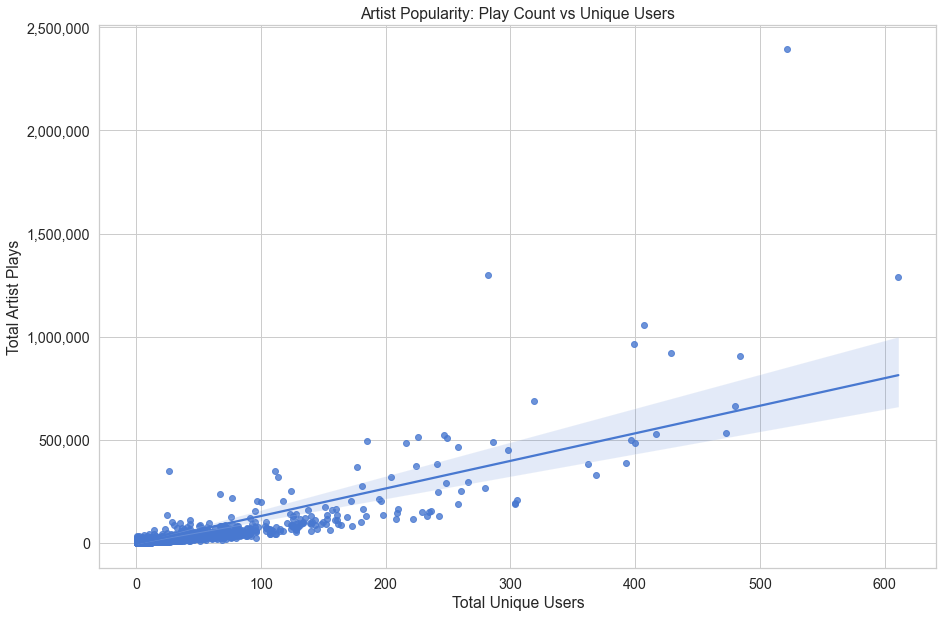

In [15]:
top_artists = artist_rank.sort_values(by='totalArtistPlays', ascending=False).head(12)

x = artist_rank.totalUniqueUsers
y =  artist_rank.totalArtistPlays
labels =  artist_rank.index

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=x,y=y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [16]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)
ap

,index,userID,artistID,playCount,name,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
0,44425,785,1,76,MALICE MIZER,3,771,257.000000,0.000213
1,44424,274,1,483,MALICE MIZER,3,771,257.000000,0.001367
2,44423,34,1,212,MALICE MIZER,3,771,257.000000,0.000598
3,63519,135,2,1021,Diary of Dreams,12,8012,667.666667,0.002892
4,63520,257,2,152,Diary of Dreams,12,8012,667.666667,0.000428
...,...,...,...,...,...,...,...,...,...
92829,77003,454,18741,301,Diamanda Galás,1,301,301.000000,0.000851
92830,77004,454,18742,294,Aya RL,1,294,294.000000,0.000831
92831,77005,454,18743,287,Coptic Rain,1,287,287.000000,0.000811
92832,77006,454,18744,286,Oz Alchemist,1,286,286.000000,0.000808


In [17]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = pd.pivot_table(
    ap,
    values='playCountScaled',
    index=['userID'],
    columns=['artistID']
)
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################

ratings_df = ratings_df.fillna(0)

ratings = ratings_df.to_numpy()
ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

In [19]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code

print(ratings[ratings > 0].shape[0] * 100 / (ratings[ratings == 0].shape[0] + ratings[ratings > 0].shape[0]))



## END

0.2763750225421394


In [19]:
ratings.shape

ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

# Fitting(Training) Model (50pts)

In [20]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    train = ratings.copy()
    validation = np.zeros(ratings.shape, dtype=ratings.dtype)
    
    for i in range(0, train.shape[0]): 
        non_zero = np.nonzero(train[i])[0]
        
        if non_zero.shape[0] >= MIN_USER_RATINGS:
            random_choices = np.random.choice(non_zero, DELETE_RATING_COUNT, replace=False)
            validation[i][random_choices] = train[i][random_choices].copy()
            train[i][random_choices] = 0
    return train, validation


In [21]:
train, val = train_test_split(ratings)

print(train.shape)
print(val.shape)


assert((train + val == ratings).all())

(1892, 17632)
(1892, 17632)


In [22]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth > 0]
    ground_truth = ground_truth[ground_truth > 0]
    return sqrt(mean_squared_error(prediction, ground_truth))


In [97]:
print(train.shape)

(1892, 17632)


In [41]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.01):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
    
    self.train_losses = []
    self.val_losses = []
  
  def predictions(self, P, Q):
    return np.dot(P, Q.T)
  
  def fit(self, X_train, X_val):
    
    print(X_train.shape)
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration
    # the shape of P is 1892 
    P = np.random.normal(0, 1, (X_train.shape[0], self.n_latent_features))
    P[P < 0] = 0
    Q = np.random.normal(0, 1, (X_train.shape[1], self.n_latent_features))
    Q[Q < 0] = 0
    print(f"P shape is: {P.shape}")
    print(f"Q shape is: {Q.shape}")
    
    
    print(rmse(np.zeros(X_train.shape), X_train))
    print(rmse(np.zeros(X_val.shape), X_val))
        
    self.n_epochs = 200
        
    for epoch in (tq := tqdm(range(self.n_epochs))): 
        tq.set_description(f"epoch: {epoch + 1}")
        
        pred_mat = self.predictions(P, Q)
        
                
        train_loss = rmse(pred_mat, X_train)
        val_loss = rmse(pred_mat, X_val)
        
        self.train_losses.append(train_loss)
        self.val_losses.append(val_loss)
        
        err_mat = (X_train - pred_mat) * (X_train > 0)
        
#         print(err_mat[err_mat > 0])

        q_grad = self.learning_rate * (err_mat.T @ P - self.lmbda * Q)

        p_grad = self.learning_rate * (err_mat @ Q - self.lmbda * P)
        
#         print("q_grad: ", ep[ep > 0])

#         print("ggood ", q_grad[q_grad > 0])

        Q = Q + q_grad 
        P = P + p_grad 
        
        
#         print(self.predictions(P, Q).shape)
#         print(X_val.shape)

        tq.set_postfix(loss=val_loss)
    
    self.P = P
    self.Q = Q
    
    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    non_ratings = np.where(X_train[user_index, :] == 0)[0]
    rating_predictions = [np.sum(self.P[user_index] * self.Q[item_index]) for item_index in non_ratings]
    return np.array(rating_predictions)

In [42]:
#creating recommender object
recommender = Recommender().fit(train, val)

(1892, 17632)
P shape is: (1892, 3)
Q shape is: (17632, 3)
0.010408782575089587
0.01192001431353801


epoch: 200: 100%|██████████| 200/200 [01:19<00:00,  2.52it/s, loss=0.0739]


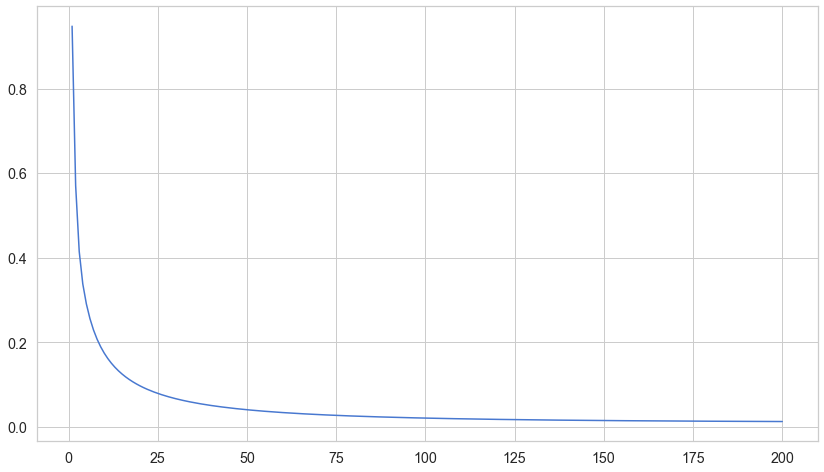

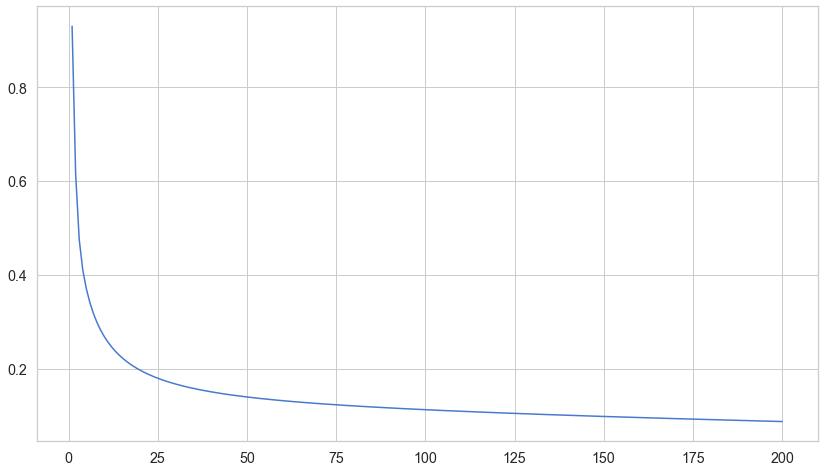

In [26]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################

plt.plot([i for i in range(1, recommender.n_epochs + 1)], recommender.train_losses)
plt.show()


print(plt.plot([i for i in range(1, recommender.n_epochs + 1)], recommender.val_losses))
plt.show()

#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [43]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [44]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [45]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,472,3 Doors Down,0.043204
2,614,Pearl Jam,0.042016
3,923,Children of Bodom,0.025657
4,978,Disturbed,0.021690
5,1104,Rammstein,0.021562
6,1118,A Perfect Circle,0.020879
7,2172,Gojira,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010990


In [46]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,513,Traff!c,0.185899
1,7342,Wall of Voodoo,0.176951
2,8628,Проверочная Линейка,0.175839
3,10682,Jonna Lee,0.172980
4,11213,Dane Cook,0.171502
5,13154,Любэ,0.170441
6,14175,The Cute Asian Girl,0.167534
7,17306,The Boy Least Likely To,0.159442
8,18346,Tom Verlaine,0.158322
9,18557,Patricia Manterola,0.157638


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**